Simple Harmonic Motion

In [1]:
from vpython import *
import numpy as np

mass_type = 'medium'

if mass_type == 'light':
    m = 0.5 #kg
elif mass_type == 'medium':
    m = 1.0 #kg
else:
    m = 2.0 #kg

#constants
k = 10 #spring
A = 0.2 #amplitude
omega = np.sqrt(k/m) #angular frequency
t_max = 10 #total time
dt = 0.01 #timestep

#objects description
scene = canvas(title="Simple Harmonic Motion", width=800, height=800)
floor = box(pos=vector(-0.2, -0.05, 0), size=vector(0.4, 0.01, 0.4), color=color.green)
wall = box(pos=vector(-0.2, 0.05, 0), size=vector(0.01, 0.1, 0.4), color=color.gray(0.5))
mass = box(pos=vector(A, 0, 0), size=vector(0.05, 0.05, 0.05), color=color.red)
spring = helix(pos=wall.pos, axis=mass.pos-wall.pos, radius=0.01, coils=15, thickness=0.003)

#graph
graph1 = graph (title="Displacement vs. Time", xtitle = "Time (s)", ytitle = "Displacement (m)")
f1 = gcurve(color=color.blue)

#time loop
t = 0
while t < t_max:
    rate(100) # 100 iteration per second 

    x = A * cos(omega * t) #displacement
    mass.pos.x = x
    spring.axis = mass.pos - wall.pos

    f1.plot(t,x)

    t += dt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Projectile Motion

In [3]:
from vpython import *


my_scene = canvas(title="Projectile Motion", width=800, height=400)

angle_deg = 45
speed = 20
g = 9.8
dt = 0.01
radius = 1

#degree to radian
angle_rad = radians(angle_deg)

#velocity components
vx = speed * cos(angle_rad)
vy = speed * sin(angle_rad)

t = 0 #time
x = 0 #pos x axis
y = 0 #pos y axis

#ball and ground
ball = sphere(pos=vector(x, y, 0), radius=radius, color=color.red, make_trail=True)
ground = box(pos=vector(50, -radius, 0), size=vector(100,1,10), color=color.green)

#simulation loop
while True:
    rate(100)
    t += dt
    x = vx * t
    y = vy * t - 0.5 * g * t**2


    if y >= 0:
        ball.pos = vector(x, y, 0)
    else:
        print("Object hit the ground at t =", round(t, 2), "seconds")
        break

<IPython.core.display.Javascript object>

Object hit the ground at t = 2.89 seconds


Object hits the ground at t = 2.89 seconds


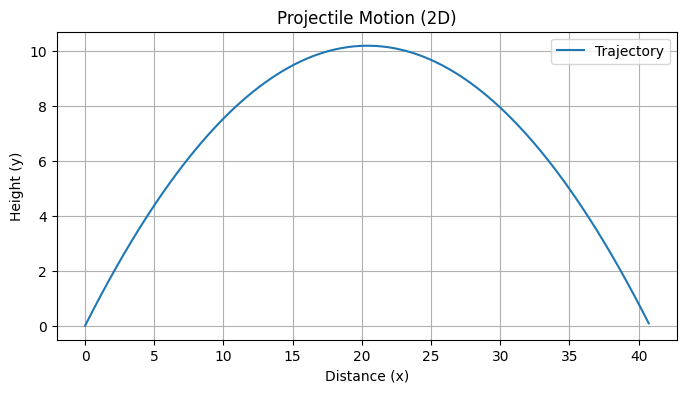

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

angle_deg = 45
speed = 20 
g = 9.8 
dt = 0.01

angle_rad = np.radians(angle_deg)

vx = speed * np.cos(angle_rad)
vy = speed * np.sin(angle_rad)

t_flight = 2 * vy / g
t = np.arange(0, t_flight, dt)

x = vx * t
y = vy * t - 0.5 * g * t**2

print(f"Object hits the ground at t = {round(t_flight, 2)} seconds")

plt.figure(figsize=(8,4))
plt.plot(x, y, label = 'Trajectory')
plt.title('Projectile Motion (2D)')
plt.xlabel('Distance (x)')
plt.ylabel('Height (y)')
plt.grid(True)
plt.legend()
plt.show()

Planetary Motion

In [4]:
from vpython import *

scene = canvas(title="Planetary Motion", width=800, height=600, background=color.black)

#constants

G = 6.674e-11 # gravitational constant
M = 1.989e30 # mass of sun
m =5.972e24 # mass of planet
AU = 1.496e11 # astronomical unit in meters
v_earth = 29780 # approximate oorbital speed (m/s)
dt = 60 * 60 # 1 hr time step 

scale = 1e9 # meters per vpython unit

T_orbit = 365.25 * 24 * 3600
T_total = 2 * T_orbit
t = 0

sun = sphere(pos=vector(0,0,0), radius=7e8/scale * 10, color=color.yellow, emissive=True)

earth = sphere(pos=vector(AU/scale, 0, 0), radius=6.4e6/scale, color=color.cyan, make_trail=True)
earth.v = vector(0, v_earth, 0)

while t < T_total:
    rate(500)

    r_vec = earth.pos - sun.pos
    r_mag = mag(r_vec) * scale # concert to meters
    r_hat = norm(r_vec)

    #Acceleration due to gravity; a = -GM/r^2
    a = -G * M / r_mag**2 * r_hat
    earth.v = earth.v + a * dt
    earth.pos = earth.pos + earth.v * dt / scale # scale back

    # time update 
    t += dt 

print("Completed 2 orbits (approx). Simulation stopped")


<IPython.core.display.Javascript object>

Completed 2 orbits (approx). Simulation stopped


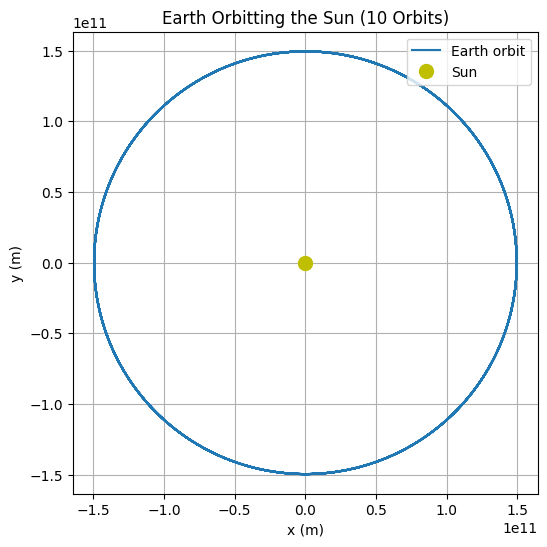

Completed 10 orbits (approx). Plot shown.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.674e-11
M = 1.989e30
AU = 1.496e11
v_earth = 29780
dt = 3600

T_orbit = 365.25 * 24 * 3600
T_total = 10 * T_orbit
t = 0

r = np.array([AU, 0.0])
v = np.array([0.0, v_earth])

x_vals = []
y_vals = []

while t < T_total:
    r_mag = np.linalg.norm(r)
    a = -G * M * r / r_mag**3
    v = v + a * dt
    r = r + v * dt

    x_vals.append(r[0])
    y_vals.append(r[1])
    t += dt

#plotting

plt.figure(figsize=(6, 6))
plt.plot(x_vals, y_vals, label="Earth orbit")
plt.plot(0, 0, 'yo', markersize=10, label="Sun")
plt.title("Earth Orbitting the Sun (10 Orbits)")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.axis('equal')
plt.grid(True)
plt.legend(loc="upper right")
plt.show()

print("Completed 10 orbits (approx). Plot shown.")